# 🐶 End to End Multi class Dog Breed Identification

- Source - https://www.kaggle.com/competitions/dog-breed-identification/overview

## 1. Problem 
Identifing the breed of a dog given an image of a dog.

## 2. Data 
from kaggle,
data :- https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dod breed of each test image 
https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation


## 4. Fautures 
Some information about the data:
* We are dealing with images (unstructured data ) so it's probably best we use deep learning/transfer learning.
* There  are 120 breeds of dogs (this means there are 120 differnt cases).
* There are more than 10,000+ images in training set
* There are around 10,000+ images in the test set (these images have no labels, because, it will be predicted)

In [ ]:
# Unziping zip data file folder

In [ ]:
# !unzip "drive/My Drive/Colab_Dog Vision data/dog-breed-identification.zip" -d "drive/My Drive/Colab_Dog Vision data"

# Get our workspace ready
* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU

In [ ]:
# importing nessasary tools
import tensorflow_hub as hub
import tensorflow as tf
print("TF version : ", tf.__version__)
print("TF Hub version : ", hub.__version__)

# Checking for GPU avaiability - meaning superfast numeric computing
print("GPU", "avilable " if tf.config.list_physical_devices("GPU") else "not available") 


TF version :  2.9.2
TF Hub version :  0.12.0
GPU avilable 


## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numeric format. So thats turning images to Tensors (numeric representation )

Let's start by checking labels 

In [ ]:
# Checkout the labels of data
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Colab_Dog Vision data/labels.csv")
print(labels_csv.head())
print(labels_csv.describe())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
type(labels_csv)

pandas.core.frame.DataFrame

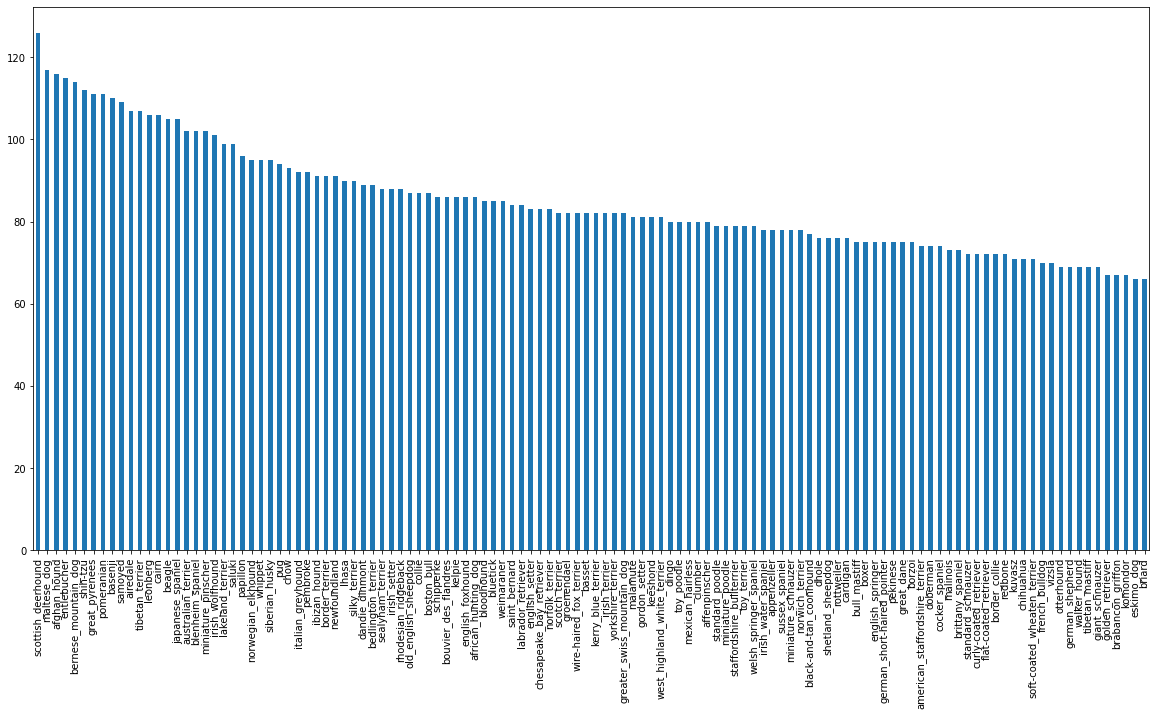

In [ ]:
 # How many images are there of each breed?
 labels_csv["breed"].value_counts().plot(kind='bar',figsize=(20, 10))

In [ ]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

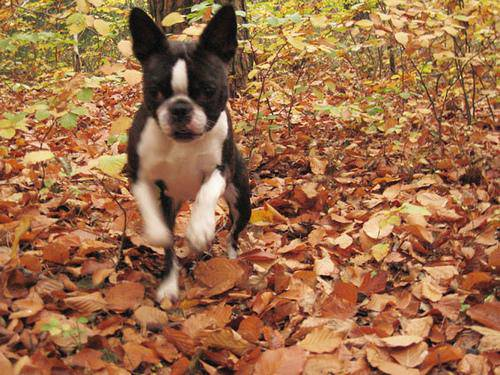

In [ ]:
# Let's view an image
from IPython.display import Image
Image("drive/My Drive/Colab_Dog Vision data/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Geting images and their labels

Let's get a list of all of our image file pathname.

In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Create pathname from ID's
filenames = [fname for fname in labels_csv["id"]]

# Create pathname from image ID's
filenames = ["drive/My Drive/Colab_Dog Vision data/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:5]


['drive/My Drive/Colab_Dog Vision data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Colab_Dog Vision data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Colab_Dog Vision data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Colab_Dog Vision data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Colab_Dog Vision data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/Colab_Dog Vision data/train")) == len(filenames):
  print("Filenames maths actual amount of data!!! Proceed")
else: 
  print("Filenames do not match actual amount of files, check the target directory")

Filenames maths actual amount of data!!! Proceed


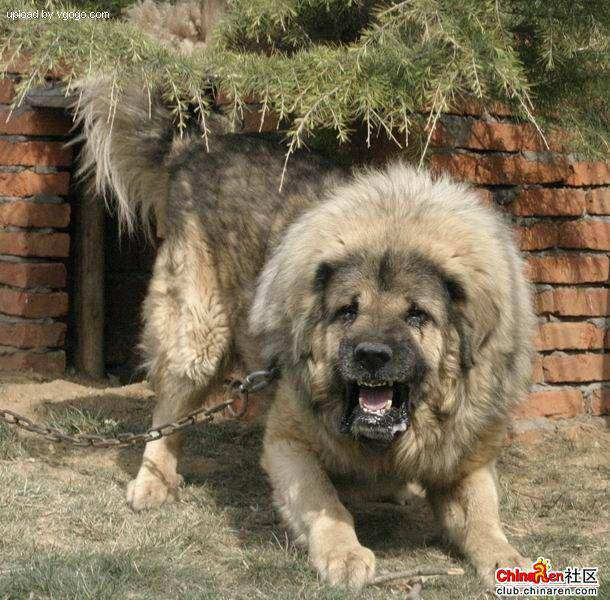

In [ ]:
# One more check 
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Preparing labels

In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of filenames matches number of labels")
else:
  print("Number of filenames do not match number of labels, check directories")

Number of filenames matches number of labels


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into a array of booleans
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]

boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels), len(labels)

(10222, 10222)

In [ ]:
# Example : Turning boolean array into integers
print(labels[0]) # Orignal breeds
print(np.where(unique_breeds == labels[0])) # index where label ocurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:5]

['drive/My Drive/Colab_Dog Vision data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Colab_Dog Vision data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Colab_Dog Vision data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Colab_Dog Vision data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Colab_Dog Vision data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

## Creating validation set


In [ ]:
# Setup X, y variables
X = filenames
y = boolean_labels

In [ ]:
len(filenames)

10222

### Experimenting with ~1000 images

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type : "slider", min:1000, max:10000, step:1000}

In [ ]:
# Spliting data into training and validation set
from sklearn.model_selection import train_test_split

# Spliting data into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                    y[:NUM_IMAGES],
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:2], y_train[:2]

(['drive/My Drive/Colab_Dog Vision data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Colab_Dog Vision data/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, 

## Preprocessign Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does few things
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a vaiable, image
3. Turn our imafe (a jpg) into Tensors
4. Normalize image (convert color channel values from 0-255 to 0-1 )
5. Resize the image to be shape of (224, 224)
6. Return the modified image

In [ ]:
# Convert a image to Nimpy arrray
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [ ]:
image.min(), image.max()

(0, 255)

In [ ]:
# Turning image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Making function 
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a vaiable, image
3. Turn our imafe (a jpg) into Tensors
4. Normalize image (convert color channel values from 0-255 to 0-1 )
5. Resize the image to be shape of (224, 224)
6. Return the modified image

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Take an image file and turns the image into a Tensor
  """
  # Read in an imafe file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical Tensor with 3 color chennels (Red, Gree, Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize image to desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
tensor = tf.io.read_file(filenames[26])
tensor

In [ ]:
tensor = tf.image.decode_jpeg(tensor, channels=3)[:2]

In [ ]:
tf.image.convert_image_dtype(tensor, tf.float32)

<tf.Tensor: shape=(2, 375, 3), dtype=float32, numpy=
array([[[0.23137257, 0.26666668, 0.25490198],
        [0.2509804 , 0.28627452, 0.27450982],
        [0.2784314 , 0.3137255 , 0.3019608 ],
        ...,
        [0.45098042, 0.5019608 , 0.42352945],
        [0.45098042, 0.5019608 , 0.42352945],
        [0.43137258, 0.48235297, 0.4039216 ]],

       [[0.25490198, 0.2901961 , 0.2784314 ],
        [0.28235295, 0.31764707, 0.30588236],
        [0.30980393, 0.34509805, 0.33333334],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.45882356, 0.50980395, 0.43137258],
        [0.454902  , 0.5058824 , 0.427451  ]]], dtype=float32)>

## Turning our data into batches

If we try to process 10000+ images in one go, they might not fit into meaning

Using 32 images at a time
 
To use tensor effectively, data should be in form of Tensor tuples which looks like this `(image, label)`



In [ ]:
# Create a function to return a tuple of (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  process the image and return a typle of (image, label)
  
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Try above function 
process_image(X[42]), tf.constant(y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn data into tuples into Tensors in the form: `(image, label)`
, let's make a function to turn all of our data (`X` & `Y`) into batches !

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Creates batches of data out of image (X) and label (Y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it it's validation data
  Also accepts test data as input (no labels) 
  """
  # If the data is a test datasets, no labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("creating validation data batches.....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths 
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnammes and labels before mapping image precessor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  
  return data_batch


In [ ]:
# Creating training and validating data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)


Creating training data batches...
creating validation data batches.....


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """
  # Set the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows , 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [ ]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:

# train_images, train_labels = next(train_data.as_numpy_iterator())
# len(train_images), len(train_labels)

(32, 32)

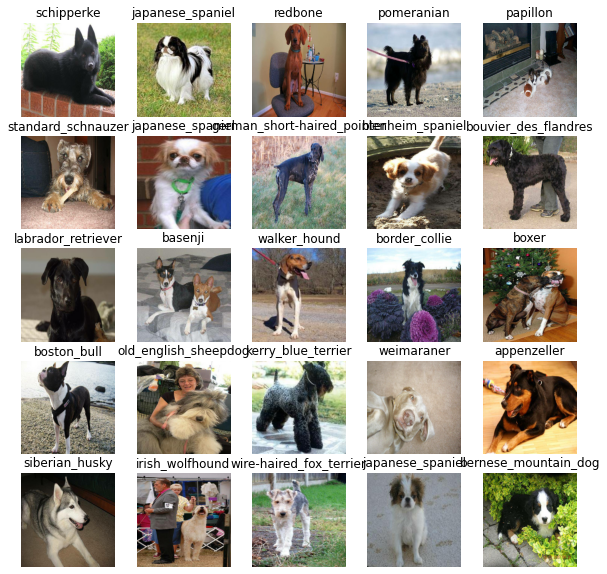

In [ ]:
# Visualising data in training batches
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

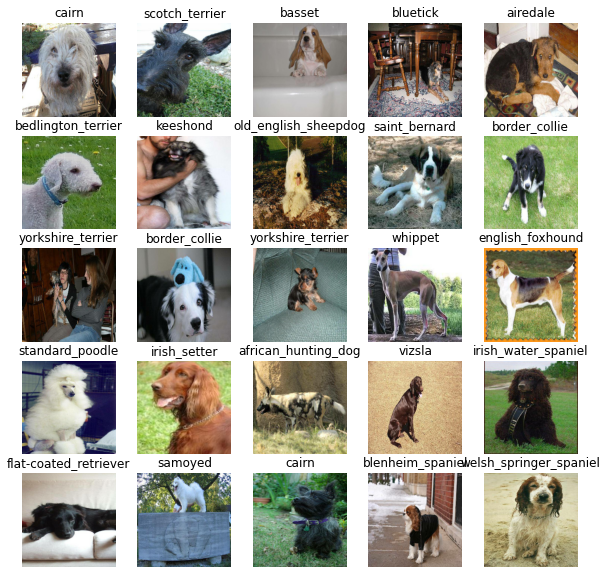

In [ ]:
# Visualising data in training batches
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are a few things we need to define:
* The input shape ( our images shape, in the form of Tensors ) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use 

In [ ]:
IMG_SIZE

224

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# setup model URL from TensorFlow Hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

Now we've got our inputs, outputs and model ready to go.
Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which :
* Takes the input shape, output shape and the model as parameter
* Defines the layers in a Keras model in sequential fashion( do this first, then this, then that)
* Compiles the model (says it should be evaluated and imporoved)
* Builds the model( tells the model the input shape it'll be getting).
* Return the model



In [ ]:
# Create a function which builds a Keras model 
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Buuilding model with: ", MODEL_URL)

  # Setup the model alayers 
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # Layer 2 (output layer)
  ])

  # Compiler the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Buuilding model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_3 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________
